In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Sett data
beerBefore = np.array([16,33,15,10,10,30,15,17,23,8,31,15,26,5,18,12,22,13,30,22,10,20,16,12,5])
beerAfter = np.array([14,33,27,11,12,27,26,25,27,27,22,36,37,3,23,7,25,17,36,31,30,22,20,29,23])
waterBefore = np.array([21,18,37,15,21,6,10,22,23,11,21,21,30,20,29,18,7,7])
waterAfter = np.array([33,23,23,13,24,8,4,21,24,21,26,27,22,21,25,20,7,3])

# Regn ut gjennomsnittsverdier

print('beerBefore:',np.mean(beerBefore))
print('BeerAfter:',np.mean(beerAfter))
print('WaterBefore:',np.mean(waterBefore))
print('WaterAfter:',np.mean(waterAfter))


beerBefore: 17.36
BeerAfter: 23.6
WaterBefore: 18.72222222222222
WaterAfter: 19.166666666666668


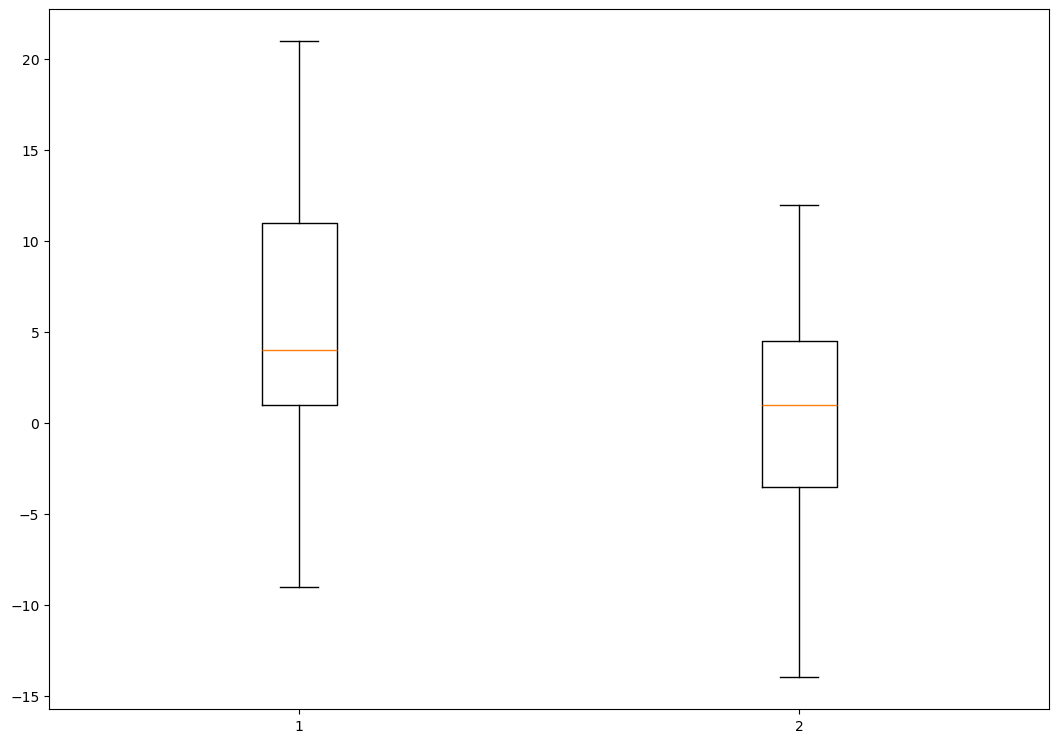

In [2]:
# lag boxplot av differanser

beerDiff = beerAfter - beerBefore
waterDiff = waterAfter - waterBefore
data = [beerDiff,waterDiff]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()


In [3]:
# Regn ut differansen mellom snittene

print('beerDiff:',np.mean(beerDiff))
print('waterDiff:',np.mean(waterDiff))

diffMean = np.mean(beerDiff)-np.mean(waterDiff)

beerDiff: 6.24
waterDiff: 0.4444444444444444


In [4]:
# Legg dataene i en lang vektor, slik at det er klart for permutering
fData = np.concatenate([beerDiff, waterDiff])
m = len(beerDiff)
n = len(waterDiff)

print('beerDiff:',np.mean(fData[:m]))
print('waterDiff:',np.mean(fData[m:]))

beerDiff: 6.24
waterDiff: 0.4444444444444444


In [ ]:
# Antall permutasjoner
B = 100000

# Initialiser teller
antall = 0

# Initialiser vektor som lagrer differenser i permuterte datasett
diffMeanPerm = np.zeros(B)

# Gjør permuteringer
for i in range(B):
    # Generer en permutering av elementene i datsettet
    xx = np.random.permutation(fData)
    diffMeanNew = np.mean(xx[:m])-np.mean(xx[m:])
    if diffMeanNew >= diffMean:
        antall += 1
    diffMeanPerm[i] = diffMeanNew


plt.hist(diffMeanPerm, bins=40)
plt.axvline(diffMean, color='red', linestyle='--')
plt.xlabel('diffMean')
plt.ylabel('Antall')
plt.title('Histogram av gjennomsnitt')

plt.show()

In [30]:
# Regn ut estimert p-verdi

pValue = (1+antall)/(B+1)
print('P-verdi:',pValue)

P-verdi: 0.007899210078992101
